In [15]:
import numpy as np
import lightgbm as lgb

In [16]:
from sklearn.datasets import load_breast_cancer

X_train, y_train = load_breast_cancer(return_X_y=True, as_frame=True)

In [17]:
# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)

# Set parameters for LightGBM
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "rf",
    "bagging_freq":1,
    "bagging_fraction":0.6,
    "num_leaves": 31,
    "learning_rate": 0.05,
    "max_depth": 4,
    "feature_fraction": 0.9,
    "verbose": -1,
}

# Train the model
num_round = 100
model = lgb.train(params, train_data, num_boost_round=num_round)

In [4]:
from tree_explainer import Explainer
from tree_explainer.plot import (
    bar_plot,
    plot_values_points,
    plot_points,
    feature_plot,
    interaction_plot,
)

In [18]:
tree = Explainer()
tree(model)

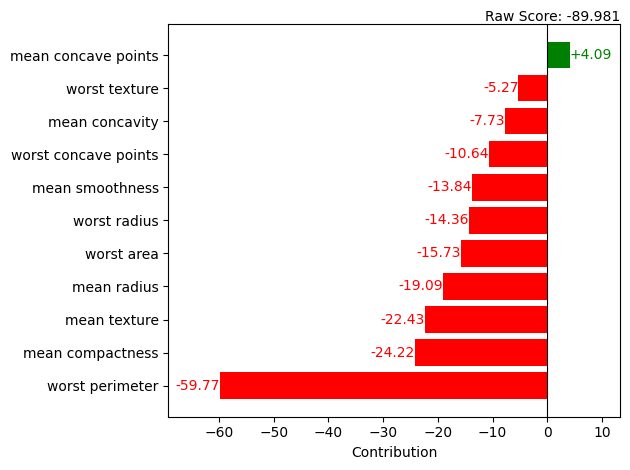

In [14]:
from tree_explainer import Explainer
from tree_explainer.plot import bar_plot


# model = lightgbm veya xgboost eğitilmiş objesi

# explainer objesini olutşur
explainer = Explainer()
explainer(model)

# tüm veriyi analiz edebilir
values, raw_score = explainer.analyze_row(X_train, detailed=False)

# veya bir satırı ya da birden çok satırı verebilirsiniz 
# values, raw_score = tree.analyze_row(X_train.iloc[[10], :], detailed=False)

bar_plot(values, raw_score, columns=X_train.columns, max_col=11)

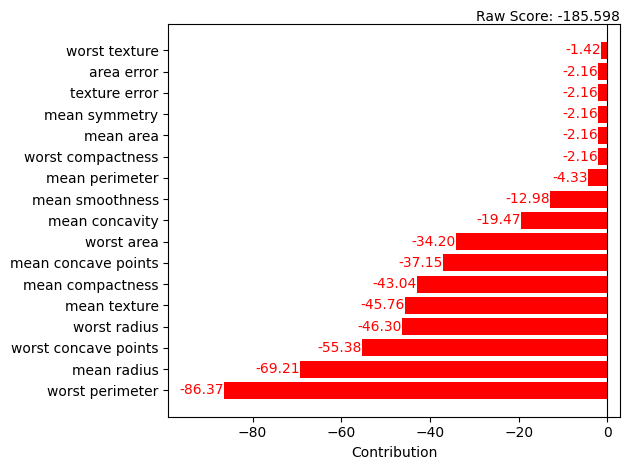

In [7]:
values, raw_score = tree.analyze_row(X_train.iloc[[0],:], detailed=False)
bar_plot(values, raw_score, columns=X_train.columns)

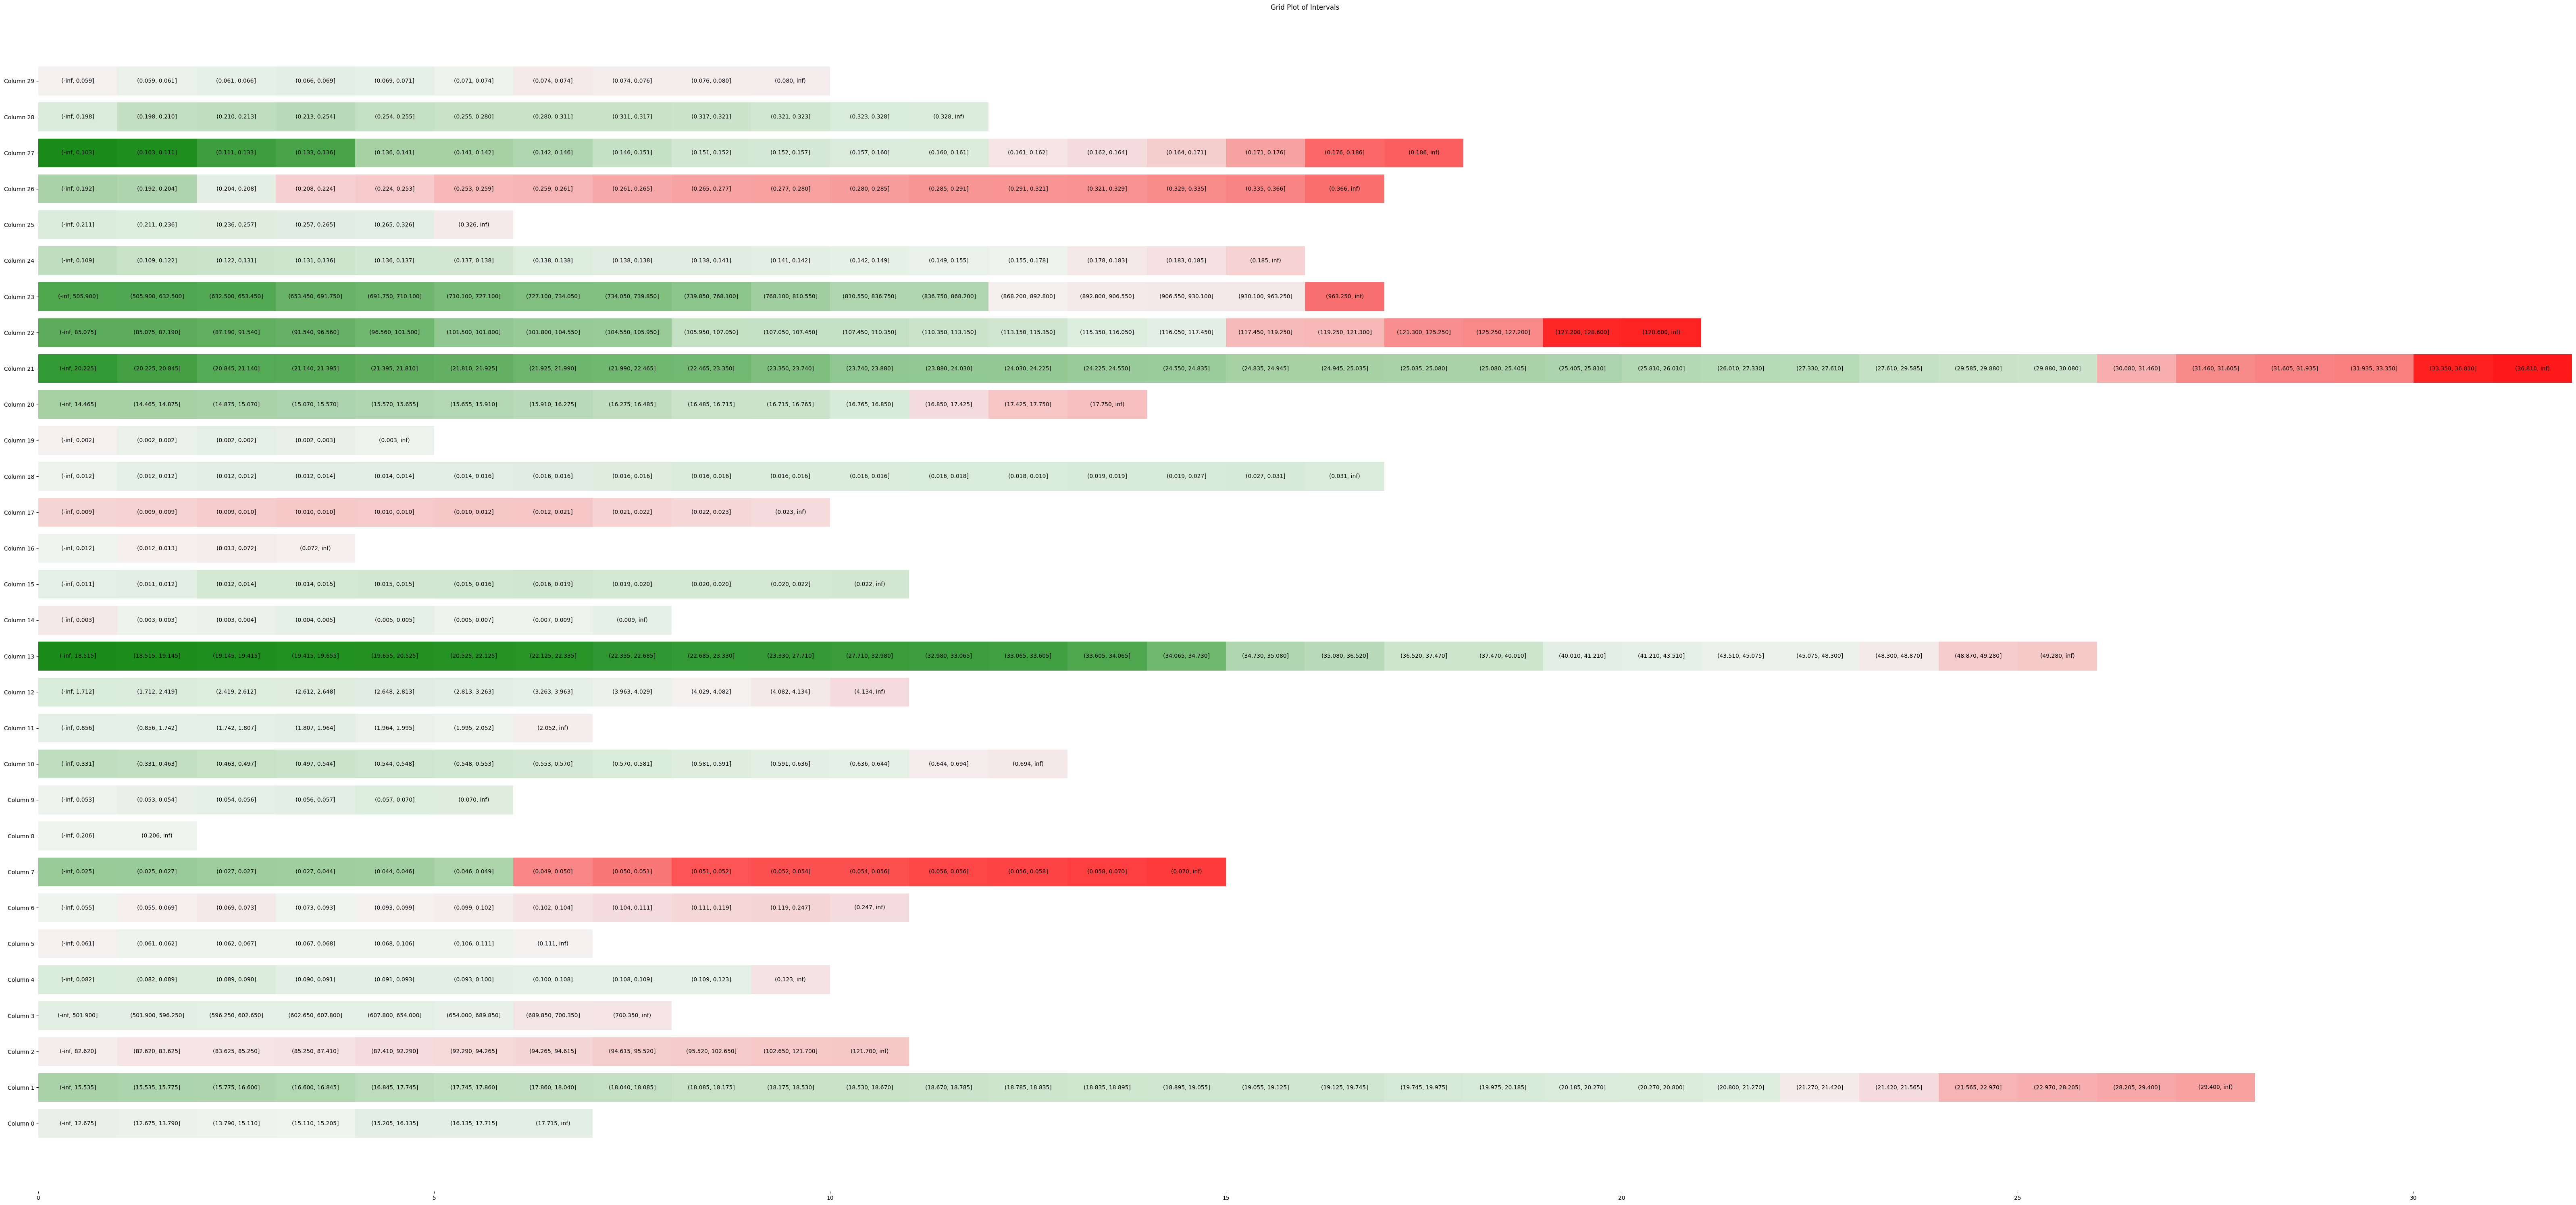

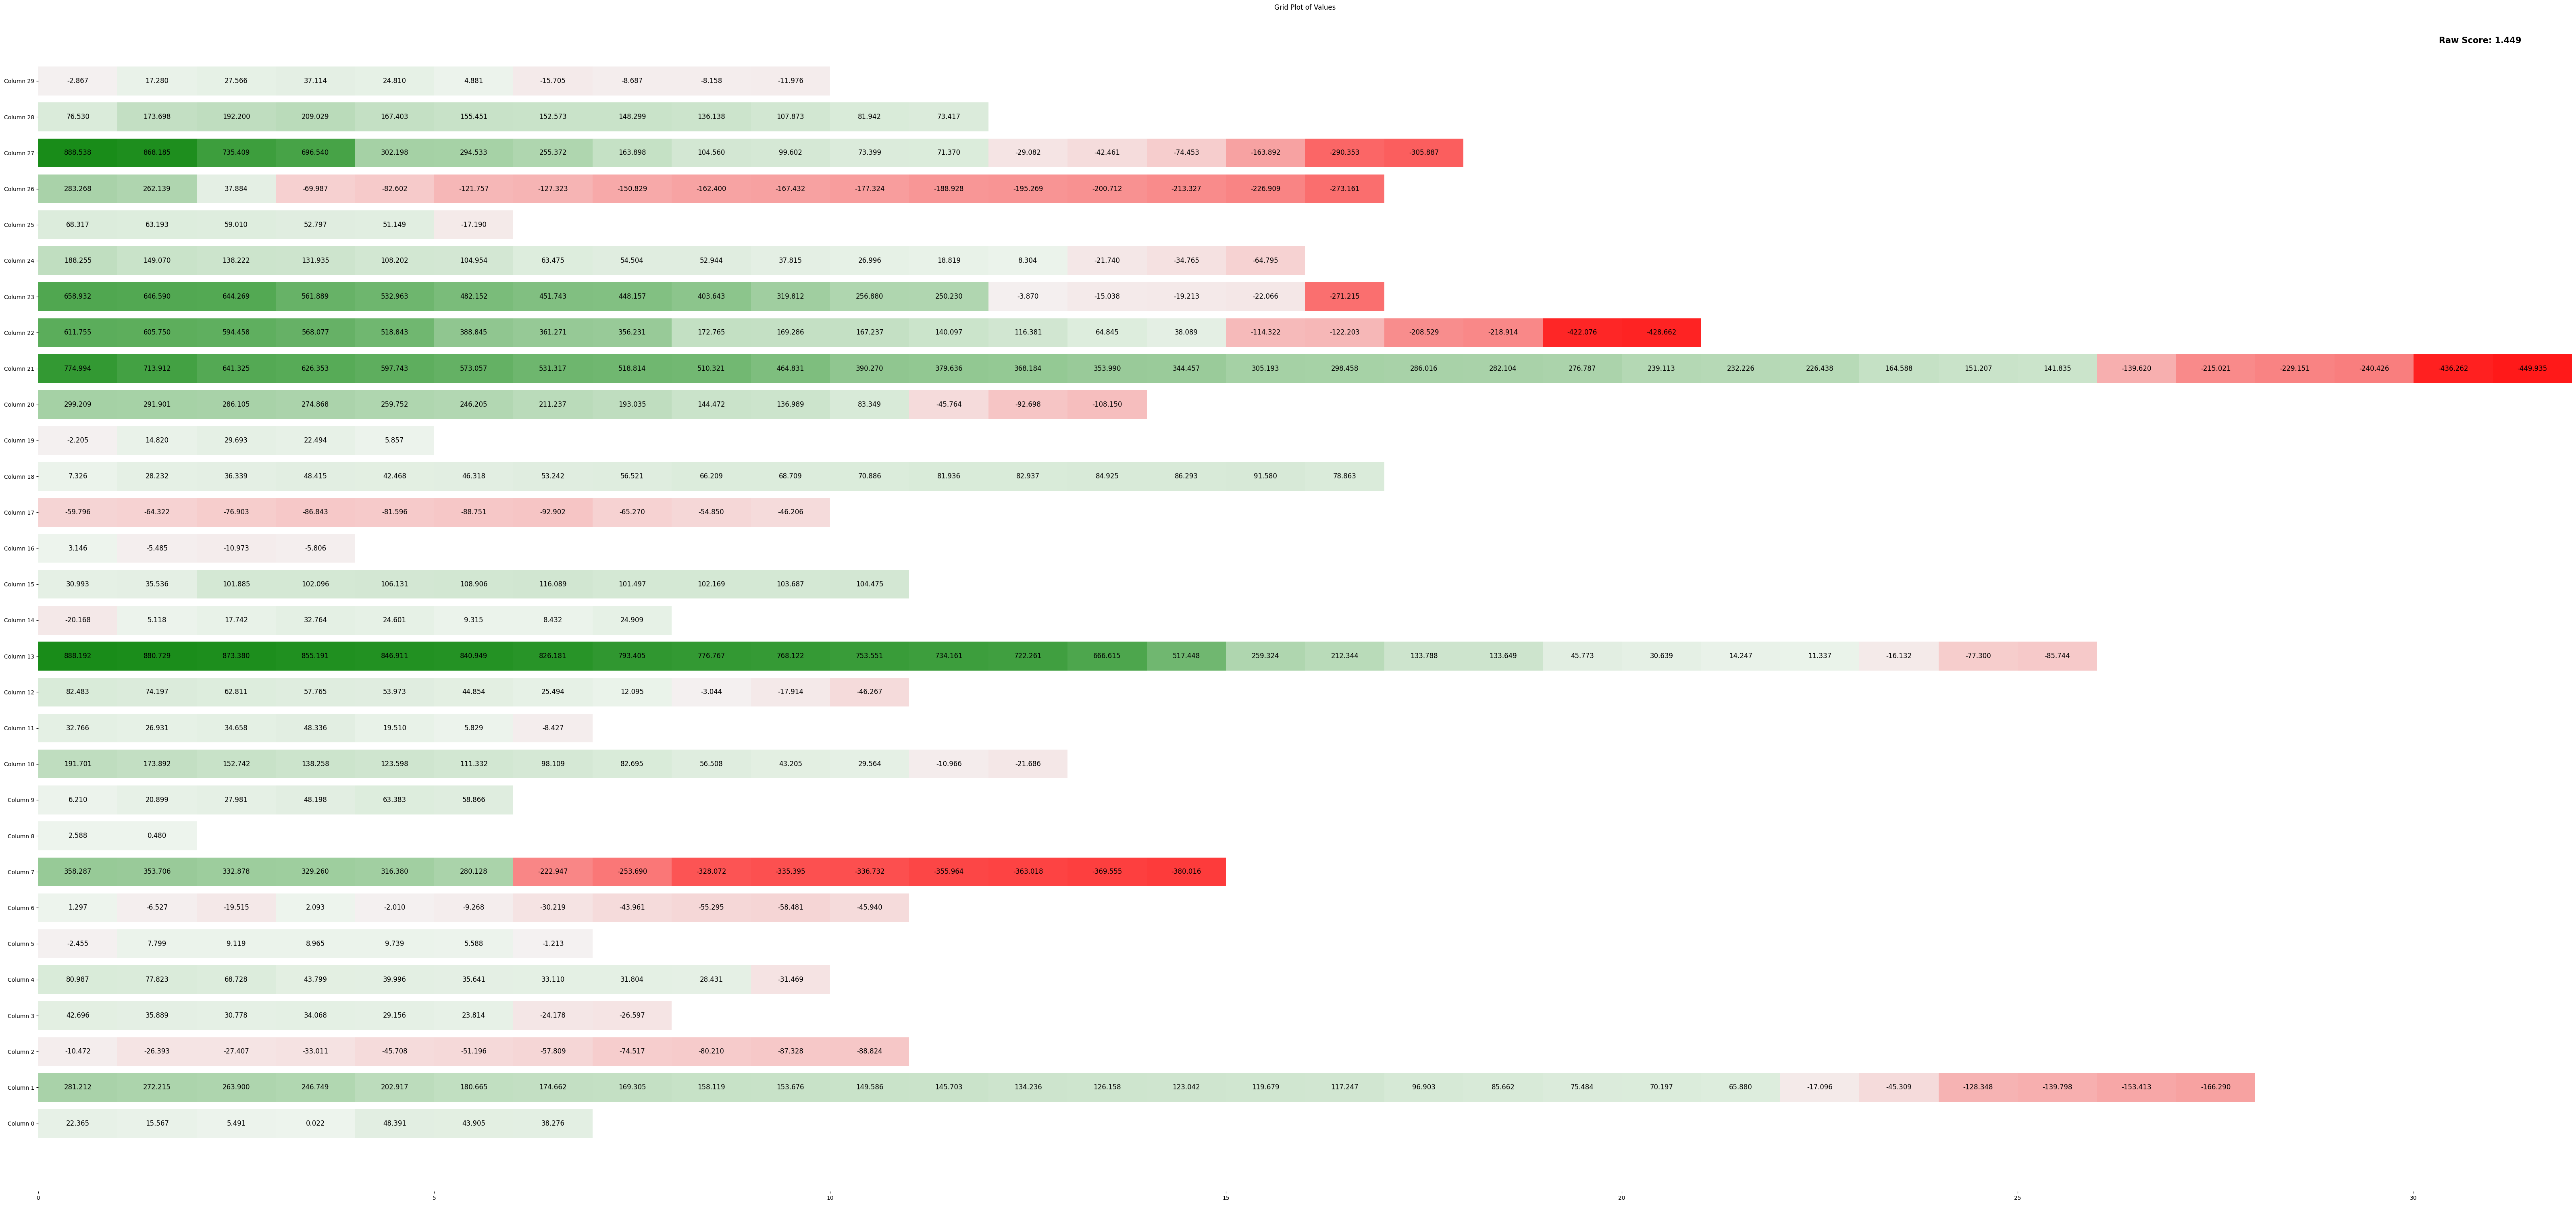

In [7]:
values, points, raw_score = tree.analyze_row(X_train, detailed=True)

plot_points(values, points)

plot_values_points(values, raw_score, points)

In [21]:
tree.count_node(True).head(20)

,column1_index,column2_index,count
0,22,27,146
1,0,22,86
2,1,22,81
3,20,27,80
4,0,27,69
5,7,22,69
6,23,27,64
7,1,27,61
8,7,20,54
9,1,7,50


In [ ]:
X_train.columns[]

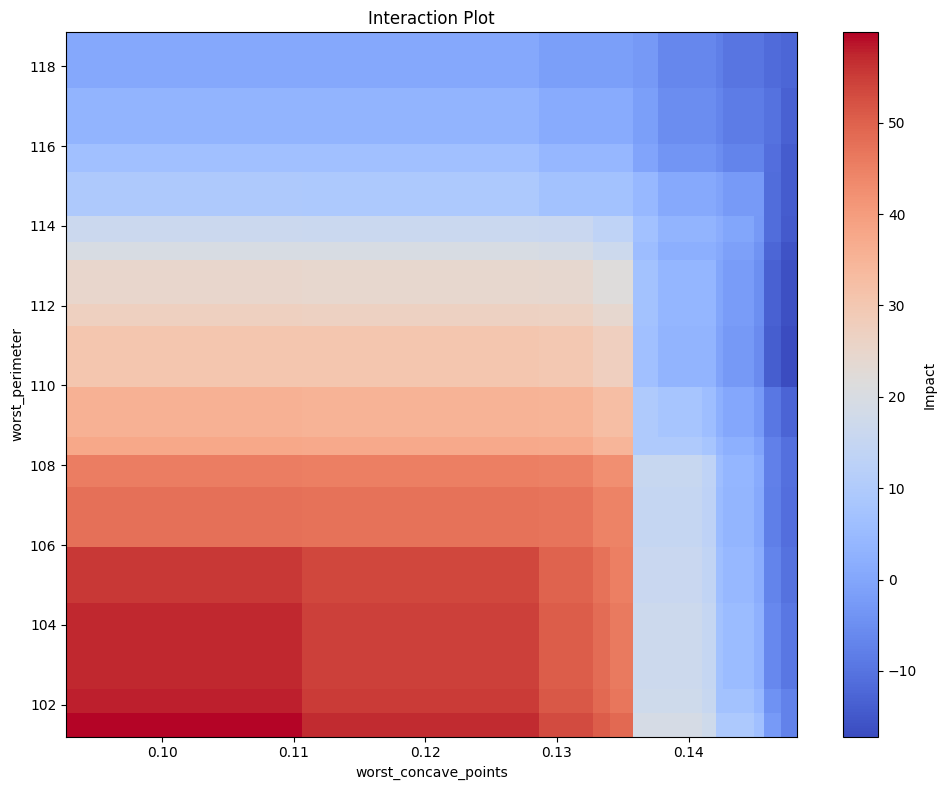

In [25]:
df = tree.analyze_dependency(22, 27)
interaction_plot(df)

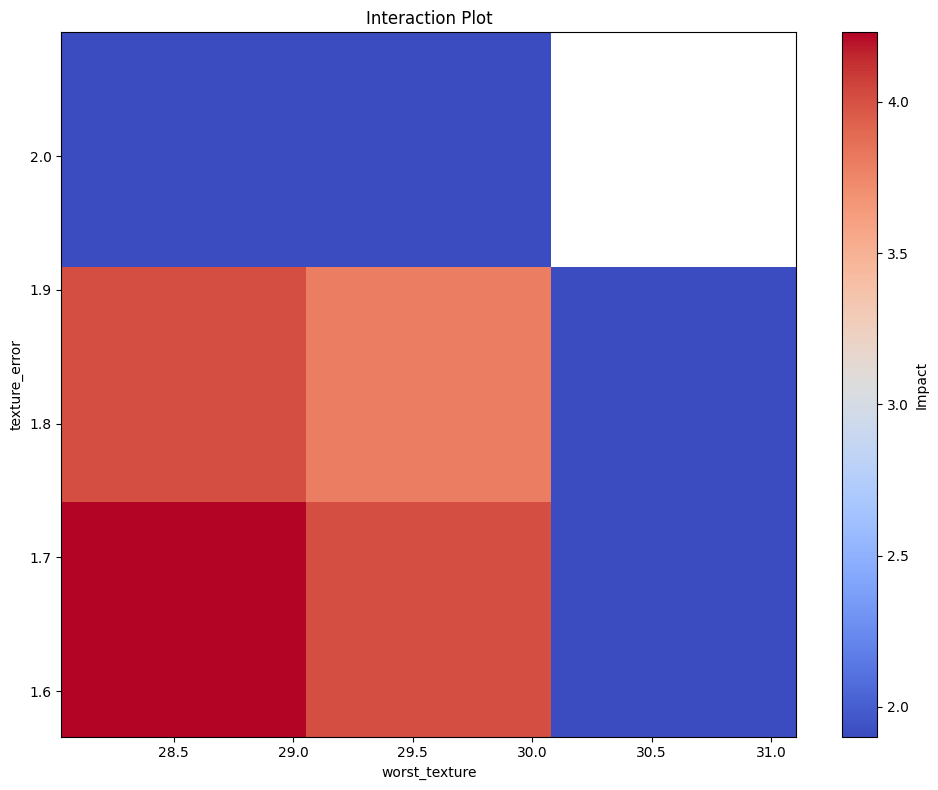

In [22]:
interaction = tree.analyze_dependency(11, 21)
interaction_plot(interaction)

In [36]:
interaction

,texture_error_lb,texture_error_ub,worst_texture_lb,worst_texture_ub,value
0,-inf,1.7415,-inf,29.055,4.229974
1,1.7415,1.9170,-inf,29.055,4.016084
2,1.9170,inf,-inf,29.055,1.901097
3,-inf,1.7415,29.055,30.080,4.016084
4,1.7415,1.9170,29.055,30.080,3.802194
5,1.9170,inf,29.055,30.080,1.901097
6,-inf,1.7415,30.080,inf,1.901097
7,1.7415,1.9170,30.080,inf,1.901097
